# Table of Contents

#### 1. Import Packages


#### 2. Read and Explore Data

    2.1 Explore Cryptopunks Dataset
    
    2.2 Explore BAYC Dataset
    
    2.3 Explore MAYC Dataset
    
    2.4 Explore WOW Dataset
    
    2.5 Observations
    
    2.6 Next steps
    

#### 3. Clean Dataset

#### 4. Create Dataset to Calculate Collateral Value
    
    4.1 Create final datasets

#### 5. Explore Final Datasets

#### 6. Calculate Collateral Value

#### 7. Visualize Collateral Value

# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display 

import warnings
warnings.filterwarnings('ignore')

# 2. Read and Explore Data

In [2]:
def get_data(file_name):
    return pd.read_csv(f"Data/{file_name}.csv")

    
df_cryptopunks = get_data("cryptopunks_data")
df_bayc = get_data("bayc_data")
df_mayc = get_data("mayc_data")
df_wow = get_data("wow_data")

In [3]:
dataset_list = [
    df_cryptopunks,
    df_bayc,
    df_mayc,
    df_wow
]

In [4]:
def get_info(dataset):

    # Take a look at the dataset and the size of the dataset
    
    display(dataset.head())
    display(dataset.shape)
    
    
    # Find the number of missing values in the dataset
    
    missing_values = pd.DataFrame(dataset.isnull().sum())
    missing_percent = pd.DataFrame(missing_values/len(dataset)*100)
    missing = pd.concat([missing_values, missing_percent], axis=1)
    missing.columns = ['Missing values', '%']
    missing = missing.sort_values(by='Missing values', ascending=False)
    display(missing[missing['Missing values'] > 0])


### 2.1 Explore Cryptopunks Dataset

In [5]:
get_info(df_cryptopunks)

,buyer_address,eth_price,usd_price,seller_address,day,utc_timestamp,token_id,transaction_hash,name,wrapped_punk
0,0x91338ccfb8c0adb7756034a82008531d7713009d,59.90,194171.84,0x1593110441ab4c5f2c133f21b0743b2b43e297cb,01/14/22,01/14/22,1139,0x5f9f302686a496329d589882b177cfc5f2c3d1ab0e7f...,CryptoPunk #1139,False
1,0xafa796c9de9b22b46f0dc1922fe017582c5e10b5,63.95,207300.32,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,01/14/22,01/14/22,3874,0x06d78978e335a6f3e2e3495bba34a162fcb5b17310a9...,CryptoPunk #3874,False
2,0x0000000000000000000000000000000000000000,50.00,162080.00,0xad4fa8a3af05080e6970aca4768d2be5f213c62d,01/14/22,01/14/22,7969,0x443a2efe5b9a64e36ff3f017c23dc48fede6cf0f9ffd...,CryptoPunk #7969,False
3,0x3e8faf5b3a4ef575a329f8c976ff27f286ab2643,67.95,220266.72,0x44a3ccddccae339d05200a8f4347f83a58847e52,01/14/22,01/14/22,5231,0x41d38012499bd318835c35c89d9568793de0889e2962...,CryptoPunk #5231,False
4,0x0000000000000000000000000000000000000000,59.00,191254.40,0xfe31364ef9e04775be662eb9e112c752bad04760,01/14/22,01/14/22,3193,0x5b6a81a42cb2dfd7662b0282d7d23465c628f2329a21...,CryptoPunk #3193,False


(19920, 10)

,Missing values,%
buyer_address,3818,19.166667
seller_address,3818,19.166667


### 2.2 Explore BAYC Dataset

In [6]:
get_info(df_bayc)

,BLOCK_TIMESTAMP,EVENT_FROM,EVENT_TO,PRICE,PROJECT_NAME,TOKEN_ID,TX_CURRENCY,TX_ID
0,2022-01-29 23:56:48.000,0x2de14db256db2597fe3c8eed46ef5b20ba390823,0x262d90cd5432611e826c12efc85c6c0c778263e2,100.00,BoredApeYachtClub,8978,ETH,0x36ff2116e52b9c658a3884a5a5ddf9bf531e790d6420...
1,2022-01-25 00:14:14.000,0xd35b392b385acad197e1b89c69cb7cca7e762f99,0x0ed1e02164a2a9fad7a9f9b5b9e71694c3fad7f2,100.69,BoredApeYachtClub,6624,ETH,0xad375b8ecabe60127d5f150ababbc61172f4f59122df...
2,2022-01-24 23:48:17.000,0xb47c728345b07028371b187cb4413cc977c23e95,0x13c463daa4aaf5c0872a8764228d356ba1eab332,97.00,BoredApeYachtClub,7389,ETH,0xbe01ac7b95e7ca1b1243497c0a381652d5b6fce39d9b...
3,2022-01-24 23:25:09.000,0x1254958bd5073c6b238e516298f0c48f6f60a78e,0xa4c16f05f3be2661245103bfb4082733d0fe8098,96.69,BoredApeYachtClub,6792,ETH,0xe3687c848beeec3dfcf31a228b12d9832691de837536...
4,2022-01-24 23:10:18.000,0x9d9869566ed468aa73627ebe3bfb02a84e9e5e76,0x539c82d5cb886c94dd3e2d76dd5c73936c1cf391,98.00,BoredApeYachtClub,5554,ETH,0xd9b4b619b419fcafb7a4594315c1c114be3d6e758df5...


(24061, 8)

,Missing values,%
PRICE,41,0.1704
TX_CURRENCY,41,0.1704


### 2.3 Explore MAYC Dataset

In [7]:
get_info(df_mayc)

,BLOCK_TIMESTAMP,EVENT_FROM,EVENT_TO,PRICE,PROJECT_NAME,TOKEN_ID,TX_CURRENCY,TX_ID
0,2022-01-31 09:28:16.000,0x9b628095d191ae097127b5a442463596b9a62600,0x960f16fff5070555c0efa22f6b839ed7d5ab6094,25.690,MutantApeYachtClub,2442,ETH,0xb72d00a8de8bc04fd56ed34a397ddc2dad78a1d52860...
1,2022-01-30 09:01:01.000,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xd3ebefbe301f3890f402dd5014f21adf91ab10ab,26.500,MutantApeYachtClub,6169,ETH,0x3d80b7194d709bbf9e3f171247cb1f6783cc7cfd72f2...
2,2022-01-25 18:56:14.000,0x28705f64c07079822c7afd66e43975b7c6095ef6,0x2a5311721ea95faa9c807876301c0f76ae13f9cc,16.850,MutantApeYachtClub,25744,ETH,0x07e4abe9eca8128d93a38f15e556e4c4288b85f605d6...
3,2022-01-25 00:40:24.000,0x8bdacff8423837792a98f1664debbe02051a8a78,0x56691e56f68a610897ef1790accf7c882abec581,17.987,MutantApeYachtClub,8,ETH,0x28c0b7b6f4b119c5ca656e8fece9f38f7425820a1b1d...
4,2022-01-25 00:28:29.000,0xc5079ba412cd806e36481c4c25c17d2a25e52e37,0x8a2cea182c174bd242b3c02cf550c4d412c026fd,16.700,MutantApeYachtClub,15688,ETH,0x77bc180c2a9d1d7d84ef9cce4e3a0ae88631527cfaba...


(23489, 8)

,Missing values,%
PRICE,83,0.353357
TX_CURRENCY,83,0.353357


### 2.4 Explore WOW Dataset

In [8]:
get_info(df_wow)

,BLOCK_TIMESTAMP,EVENT_FROM,EVENT_TO,PRICE,PROJECT_NAME,TOKEN_ID,TX_CURRENCY,TX_ID
0,2022-01-25 00:48:37.000,0xfd49ffbd075aaf57e7d7df2608d64ca494ffb6df,0x6a27af7f7a1d80fac6fb8f7e5cec9a88eff26ec6,37.50,World_Of_Women,9647,ETH,0xb888fa28361ed0acb53bf6ad79512ca2f7c65c97caee...
1,2022-01-25 00:25:03.000,0xb5cb6dba9a9ad75e2ff03d6f0253aff2cd6c5029,0x20556e46ef77fa166d27f0b701c463022b5ab83f,7.45,World_Of_Women,5559,ETH,0xe62d0f47b93cadb485487f4cae93c248cf6aa1a453fb...
2,2022-01-25 00:16:17.000,0xa0c9bba341881a8d8f835194745d312bb56b4284,0x20556e46ef77fa166d27f0b701c463022b5ab83f,8.00,World_Of_Women,5587,ETH,0xfe07ba2c8bfaf40fc7be93bd434b4580e1f1555d6b2f...
3,2022-01-24 22:56:00.000,0xaf97a78a41d1d030c89bb5e29e14ada03dc802ce,0x28ee3605321a598d716f9cdda26e226f54af9305,10.00,World_Of_Women,9362,ETH,0x07aebdbe39e346d53b326ed0a110b12bbb4b7de4a4da...
4,2022-01-24 22:19:04.000,0x28ee3605321a598d716f9cdda26e226f54af9305,0xaf34964b228d7c671fdac25a277f9d9a33fa9730,7.30,World_Of_Women,8766,ETH,0xcc2aa82505967604780feb0bde65b29156f32994997a...


(20784, 8)

,Missing values,%
PRICE,147,0.707275
TX_CURRENCY,147,0.707275


### 2.5 Observations:

- To calculate collateral values, we just need the date and price columns
- The Cryptopunks dataset is different from the other three

### 2.6 Next steps:

- Drop rows with missing values for date and price. 
    - These cannot be imputed in any meaningful way, and a very small percent of rows are missing.
- Drop all columns except date, transaction ID, transaction price, and project name.
    - To keep the datasets consistent, we will only consider the price in $ETH

# 3. Clean Dataset

- Start by changing column names and types for the Cryptopunks dataset to match the other three
- Then, for all datasets, write a function to:
    - Drop all columns except date, transaction price, transaction ID, and project name
        - Project name will be useful later when we combine all the final datasets into one
        - Transaction ID will be useful later to calculate the number of daily transactions
    - Drop missing values
    - Change the column type of 'day' to datetime

In [9]:
df_cryptopunks['PROJECT_NAME']='Cryptopunks'

# Change column names for the Cryptopunks dataset
df_cryptopunks.rename(columns={'day':'BLOCK_TIMESTAMP', 'eth_price':'PRICE', 'transaction_hash':'TX_ID'}, inplace=True)

In [10]:
def clean_data(dataset):
    
    # Drop irrelevant columns
    dataset_clean = dataset[['BLOCK_TIMESTAMP','PRICE','TX_ID', 'PROJECT_NAME']]
    
    # Change datatype to datetime and standardize to show only the year, month and date
    dataset_clean['BLOCK_TIMESTAMP'] = pd.to_datetime(dataset['BLOCK_TIMESTAMP']).dt.date
    
    # Drop null values
    dataset_clean.dropna(axis=0, inplace=True)
    
    display(dataset_clean.head())
    display(dataset.shape)
    
    return dataset_clean

In [11]:
print("\nCryptopunks:")
cryptopunks_clean = clean_data(df_cryptopunks)

print("\nBAYC:")
bayc_clean = clean_data(df_bayc)

print("\nMAYC:")
mayc_clean = clean_data(df_mayc)

print("\nWOW:")
wow_clean = clean_data(df_wow)


Cryptopunks:


,BLOCK_TIMESTAMP,PRICE,TX_ID,PROJECT_NAME
0,2022-01-14,59.90,0x5f9f302686a496329d589882b177cfc5f2c3d1ab0e7f...,Cryptopunks
1,2022-01-14,63.95,0x06d78978e335a6f3e2e3495bba34a162fcb5b17310a9...,Cryptopunks
2,2022-01-14,50.00,0x443a2efe5b9a64e36ff3f017c23dc48fede6cf0f9ffd...,Cryptopunks
3,2022-01-14,67.95,0x41d38012499bd318835c35c89d9568793de0889e2962...,Cryptopunks
4,2022-01-14,59.00,0x5b6a81a42cb2dfd7662b0282d7d23465c628f2329a21...,Cryptopunks


(19920, 11)


BAYC:


,BLOCK_TIMESTAMP,PRICE,TX_ID,PROJECT_NAME
0,2022-01-29,100.00,0x36ff2116e52b9c658a3884a5a5ddf9bf531e790d6420...,BoredApeYachtClub
1,2022-01-25,100.69,0xad375b8ecabe60127d5f150ababbc61172f4f59122df...,BoredApeYachtClub
2,2022-01-24,97.00,0xbe01ac7b95e7ca1b1243497c0a381652d5b6fce39d9b...,BoredApeYachtClub
3,2022-01-24,96.69,0xe3687c848beeec3dfcf31a228b12d9832691de837536...,BoredApeYachtClub
4,2022-01-24,98.00,0xd9b4b619b419fcafb7a4594315c1c114be3d6e758df5...,BoredApeYachtClub


(24061, 8)


MAYC:


,BLOCK_TIMESTAMP,PRICE,TX_ID,PROJECT_NAME
0,2022-01-31,25.690,0xb72d00a8de8bc04fd56ed34a397ddc2dad78a1d52860...,MutantApeYachtClub
1,2022-01-30,26.500,0x3d80b7194d709bbf9e3f171247cb1f6783cc7cfd72f2...,MutantApeYachtClub
2,2022-01-25,16.850,0x07e4abe9eca8128d93a38f15e556e4c4288b85f605d6...,MutantApeYachtClub
3,2022-01-25,17.987,0x28c0b7b6f4b119c5ca656e8fece9f38f7425820a1b1d...,MutantApeYachtClub
4,2022-01-25,16.700,0x77bc180c2a9d1d7d84ef9cce4e3a0ae88631527cfaba...,MutantApeYachtClub


(23489, 8)


WOW:


,BLOCK_TIMESTAMP,PRICE,TX_ID,PROJECT_NAME
0,2022-01-25,37.50,0xb888fa28361ed0acb53bf6ad79512ca2f7c65c97caee...,World_Of_Women
1,2022-01-25,7.45,0xe62d0f47b93cadb485487f4cae93c248cf6aa1a453fb...,World_Of_Women
2,2022-01-25,8.00,0xfe07ba2c8bfaf40fc7be93bd434b4580e1f1555d6b2f...,World_Of_Women
3,2022-01-24,10.00,0x07aebdbe39e346d53b326ed0a110b12bbb4b7de4a4da...,World_Of_Women
4,2022-01-24,7.30,0xcc2aa82505967604780feb0bde65b29156f32994997a...,World_Of_Women


(20784, 8)

# 4. Create Dataset to Calculate Collateral Value

- Filter out 0.15 x (Q1 of daily transactions) as per the collateral value definition
- Calculate the number of daily transactions
- Calculate the daily price floor
- Create and return a new dataset with the date, daily price floor, and number of daily transactions

In [12]:
def create_cv_dataset(dataset):
    '''
    Takes the original cleaned dataset and returns a new dataset with all relevant information to calculate the collateral value.
    Note: The format of this dataset will be different from the original, so make sure to save as a different DataFrame.
    '''
    
    # Figure out daily first quantile price
    # To calculate the collateral value we will use values greater than this value
    price_daily_q1 = dataset.groupby('BLOCK_TIMESTAMP').quantile(0.25)
    
    # Map this value of daily Q1 price to the date
    mapping_date_to_q1 = price_daily_q1['PRICE'].to_dict()
    
    # Create a new column with the daily Q1 value for each row
    dataset['Q1_DAILY'] = dataset['BLOCK_TIMESTAMP'].map(mapping_date_to_q1)
    
    # Filter out high rarity assets and wash trades
    dataset_filtered = dataset[dataset['PRICE'] > 0.15 * dataset['Q1_DAILY']]
    
    # Calculate daily price floor
    daily_price_floor =  dataset_filtered[['BLOCK_TIMESTAMP','PRICE']].groupby('BLOCK_TIMESTAMP').min()['PRICE']
    
    # Calculate number of daily transactions
    daily_transactions = dataset_filtered.groupby('BLOCK_TIMESTAMP').count()['TX_ID']
    
    # Create new DataFrame by concatenating the date, daily price floor and daily transactions
    final_dataset = pd.DataFrame()
    final_dataset = pd.concat([daily_price_floor, daily_transactions], axis=1).reset_index()
    
    # Include project names for the final dataset. This will be useful later when the 4 datasets are combined
    final_dataset['project_name'] = dataset_filtered['PROJECT_NAME']
    
    # Rename columns
    final_dataset = final_dataset.rename(columns={
        'BLOCK_TIMESTAMP': 'date',
        'PRICE': 'eth_price_floor',
        'TX_ID': 'num_daily_transactions'
    })
    
    # Add price floor = 0 and daily transactions = 0 for days when no transactions occurred
    # This will be achieved using the following steps:
    # Step 1: Create a new index series which contains all dates between the earliest and latest date
    new_index = pd.date_range(final_dataset['date'].min(), final_dataset['date'].max())
    
    # Step 2: Temporarily set the date column as the index
    final_dataset = final_dataset.set_index('date')
    
    # Step 3: Reindex the dataset with this new index series and fill in zeros for all the rows with empty values
    final_dataset = final_dataset.reindex(new_index, fill_value=0)
    
    # Step 4: Reset the index and rename the column back to 'date'
    final_dataset = final_dataset.reset_index()
    final_dataset = final_dataset.rename(columns={'index':'date'})
    
    return final_dataset

### 4.1 Create final datasets

In [13]:
cryptopunks_cv = create_cv_dataset(cryptopunks_clean)
bayc_cv = create_cv_dataset(bayc_clean)
mayc_cv = create_cv_dataset(mayc_clean)
wow_cv = create_cv_dataset(wow_clean)

In [14]:
cryptopunks_cv.head()

,date,eth_price_floor,num_daily_transactions,project_name
0,2017-06-23,1.000000e-02,18,Cryptopunks
1,2017-06-24,1.000000e-03,16,Cryptopunks
2,2017-06-25,1.000000e-01,12,Cryptopunks
3,2017-06-26,1.000000e-06,5,Cryptopunks
4,2017-06-27,1.000000e-18,23,Cryptopunks


# 5. Explore Final Datasets

As an example, the cryptopunks dataset now has 1210 rows, but if we calculate the maximum vs. minimum date values, we should in fact have 1666 days (1667 including the first day). Shown below are the rows before adding in dates with zero transactions

In [15]:
#cryptopunks_cv.shape
#>>> Output: (1210, 5)

#cryptopunks_cv['date'].max() - cryptopunks_cv['date'].min()
#>>> Output: datetime.timedelta(days=1666)

- This tells us that there were days when there were no transactions
- To correctly calculate the moving average, we will have to input these dates and set the price floor and daily transactions to zero
- Go back to the function above to add these changes

In [16]:
cryptopunks_cv.shape

(1667, 4)

# 6. Calculate Collateral Value

In [17]:
def calculate_cv(dataset):
    '''
    Calculates the collateral value for each date and creates a new column with the calculated values
    '''
    
    # Calculate the numerator and create a columm
    dataset['numerator'] = dataset['eth_price_floor'] * dataset['num_daily_transactions']
    
    # Create a blank column to store the collateral values
    dataset['collateral_value'] = np.nan
    
    # n_day_avg refers to the type of moving average
    # In this case, n_day_avg = 30 will use the 30 day moving average to calculate CV
    n_day_avg = 30
    
    # Calculate collateral value
    for i in range(n_day_avg, len(dataset)+1):
        starting_row = i - n_day_avg     # First day of moving avg calculation
        ending_row = i - 1               # Last day of moving avg calculation
        dataset['collateral_value'].loc[i] = dataset['numerator'].loc[starting_row:ending_row].sum() / dataset['num_daily_transactions'].loc[starting_row:ending_row].sum()
        
    return dataset

In [25]:
# Calculate collateral values

cryptopunks_cv = calculate_cv(cryptopunks_cv)
bayc_cv = calculate_cv(bayc_cv)
mayc_cv = calculate_cv(mayc_cv)
wow_cv = calculate_cv(wow_cv)

# Combine datasets
dataset_list_cv = [
    cryptopunks_cv,
    bayc_cv,
    mayc_cv,
    wow_cv
]


df_combined = pd.concat(dataset_list_cv)

# 7. Visualize Collateral Values

In [19]:
def visualize_cv(dataset):
    sns.set_style('whitegrid')
    plt.figure(figsize = (8, 8))
    sns.lineplot(x='date', y='collateral_value', data=dataset)
    plt.xlabel('\nDate', fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel('Collateral Value (Eth)', fontsize=14)

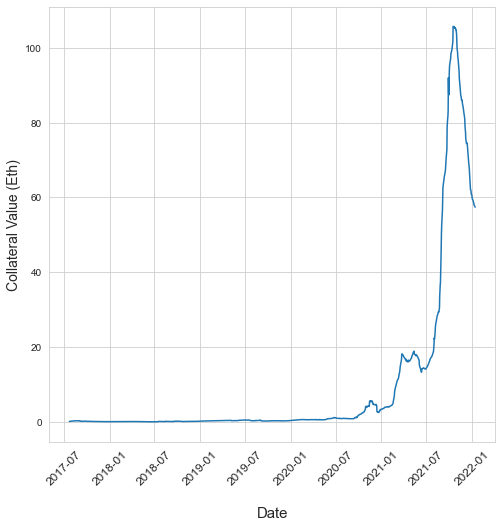

In [20]:
visualize_cv(cryptopunks_cv)

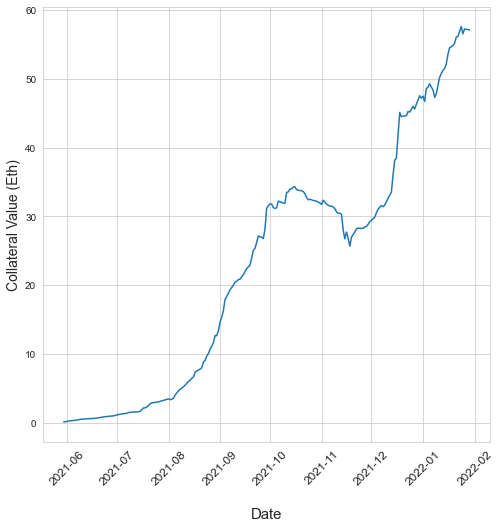

In [21]:
visualize_cv(bayc_cv)

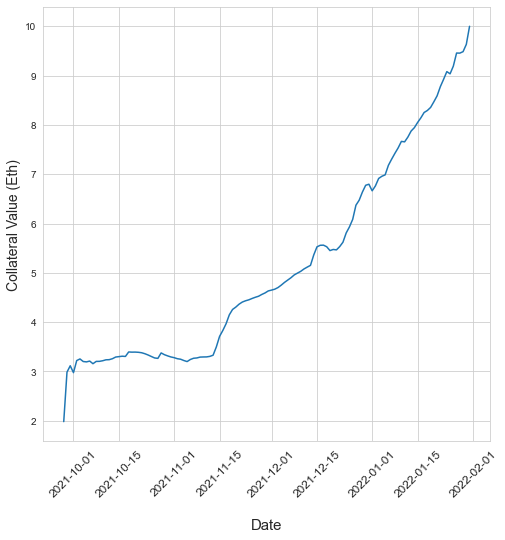

In [22]:
visualize_cv(mayc_cv)

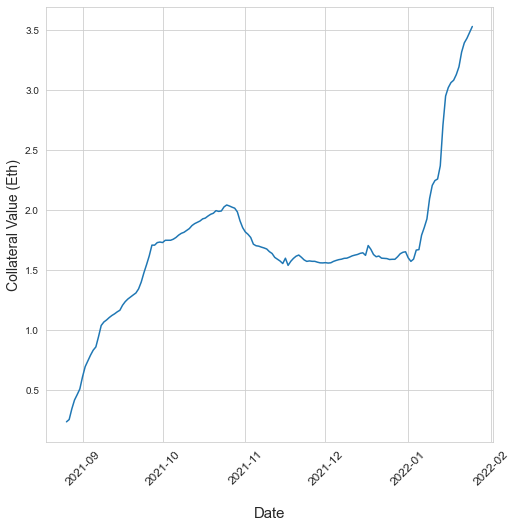

In [23]:
visualize_cv(wow_cv)